<h2> Analysis of Functional Vision in MrOS V1 Data </h2> 

The purpose of this workbook is take begin exploring the vast amount of data that we have.  Through various methods of exploration, we hope to find general trends, patterns, and correlations in the data that will help lead to us a reliable predictive model. 

#### 1. [Installation and Importing of Libraries](#eda_import)
#### 2. [Retreival of Data](#eda_retrieval)
#### 3. [Exploration of NA Values](#eda_na)
#### 4. [Descriptive Statistics](#eda_describe)


### <a name="eda_import"></a>Installation and Importing of Libraries
In order to both explore and visualize the data, it's necessary for us to load various libraries.  In addition to loading already pre-installed libraries, we've also had to install seaborn for plotting. 

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.7/site-packages (0.12.2)


In [2]:
##import libraries required for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer


In [3]:
sns.__version__

'0.12.2'

### <a name="eda_retrieval"></a>Retreival of Data
The data needs to be retrieved from the Postgres database and stored in a dataframe for us to begin analyzing.

As we've described, the dataset is very wide and in order to properly analyze, we need to reduce the number of features we're looking at. 
From the v1aug16_raw table, we're limiting the columns to values containing functional vision using regular expressions (columns begin with FV).

In [4]:
##Connect to Postgre
import psycopg2
import sqlalchemy
import getpass
import pandas as pd 

user = "dtfp3"
host = "pgsql.dsa.lan"
database = "casestdysu23t03"
password = getpass.getpass()
connectionstring = "postgresql://" + user + ":" + password + "@" + host + "/" + database
engine = sqlalchemy.create_engine(connectionstring)
connection = None

try:
    connection = engine.connect()
except Exception as err:
    print("An error has occurred trying to connect: {}".format(err))

del password

········


In [5]:
query = "SELECT * FROM public.v1_form_fv"
fv = pd.read_sql_query(query, con=connection)

In [6]:
fv

,ID,FVSTAFF,FVLTRNO,FVLTR10,FVBLGLAS,FVBLGLSN,FVBLGLCT,FVBLTPGL,FVBLTPCT,FVBLCHRT,...,FVFSTEST,FVFSWHYN,FVBLLTRC,FVLOGMAR,FV2050,FV2040,FVLCS,FVLCS155,FVDISPAR,FV
0,BI0001,BI99,15.0,1.0,1.0,1.0,1.0,3.0,NaN,1.0,...,1.0,NaN,67.0,-0.14,0.0,0.0,1.70,0.0,1.0,1.0
1,BI0002,BI16,15.0,1.0,1.0,1.0,1.0,2.0,NaN,1.0,...,1.0,NaN,59.0,0.02,0.0,0.0,1.60,0.0,2.0,1.0
2,BI0003,BI01,15.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,54.0,0.12,0.0,0.0,1.55,0.0,1.0,1.0
3,BI0004,BI16,15.0,1.0,1.0,1.0,1.0,2.0,NaN,1.0,...,1.0,NaN,58.0,0.04,0.0,0.0,1.65,0.0,1.0,1.0
4,BI0005,BI01,15.0,1.0,1.0,1.0,1.0,2.0,NaN,1.0,...,1.0,NaN,53.0,0.14,0.0,0.0,1.65,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,SD9014,SD26,15.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,1.0,NaN,50.0,0.20,0.0,0.0,1.40,1.0,1.0,1.0
5990,SD9015,SD04,15.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,1.0,NaN,66.0,-0.12,0.0,0.0,1.90,0.0,1.0,1.0
5991,SD9016,SD26,15.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,1.0,NaN,68.0,-0.16,0.0,0.0,1.75,0.0,1.0,1.0
5992,SD9017,SD26,15.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,1.0,NaN,52.0,0.16,0.0,0.0,1.50,1.0,1.0,1.0


### <a name="eda_na"></a>Exploration of NA Values
Lot of NaN values in our dataset. We'll explore, as well as provide some reasoning for why null values are handled in certain ways below. Thankfully, our dataset comes with a lot of documentation. Referring to the annotated form used for clinical interviews provides insight here. 

In [7]:
pd.set_option('display.max_rows', None)
print(pd.DataFrame(fv.isna().sum(), columns=['Missing Values']))
pd.reset_option('display.max_rows')

          Missing Values
ID                     0
FVSTAFF                0
FVLTRNO                3
FVLTR10                3
FVBLGLAS              17
FVBLGLSN            1196
FVBLGLCT            1246
FVBLTPGL            1313
FVBLTPCT            5927
FVBLCHRT              17
FVBLDIST              17
FVBLLTR               19
FVBLTEST               0
FVBLWHYN            5974
FVPRGLAS              20
FVPRGLSN            1243
FVPRTPGL            1310
FVPRTPCT            5927
FVPRCHRT              20
FVPRDIST              20
FVPRLTR               22
FVPRTEST               0
FVPRWHYN            5972
FVFSGLAS              17
FVFSGLSN             644
FVFSTPGL             798
FVFSTPCT            5944
FVFSYN                23
FVFSP2T1             420
FVFSP2T2             420
FVFSP2T3             421
FVFSP2T4            5590
FVFSP2T5            5590
FVFSP2T6            5593
FVFSP2PF             420
FVFSP3T1             755
FVFSP3T2             755
FVFSP3T3             756
FVFSP3T4            5434


FVBLWHYN, FVPRWHYN, FVFSWHYN: reasons why certain tests weren't administered, and are blank when the tests were administered. 

FVFSP2T1, FVFSP2T2, FVFSP2T3, FVFSP2PF, FVFSP3T1, FVFSP3T2, FVFSP3T3, FVFSP3PF: individual trials of different tests.
FVFSP2T4, FVFSP2T5, FVFSP2T6, FVFSP3T4, FVFSP3T5, FVFSP3T6, FVFSP1T1, FVFSP1T2, FVFSP1T3, FVFSP1T4, FVFSP1T5, FVFSP1T6, FVFSP1PF: trials weren't always conducted up to this point

We should make all NAs in FVBLGLAS, FVBLGLSN, FVBLGLCT, FVBLTPGL, FVBLTPCT, FVPRGLAS,  FVPRGLSN, FVPRTPGL, FVPRTPCT, FVFSGLAS,  FVFSGLSN , FVFSTPGL, FVFSTPCT, to 0 to indicate no glasses or contacts worn. Also make these 0, as if they could not pass the FVLtr10 test, then they were not allowed to complete the following tests: FVPRCHRT, FVPRDIST, FVPRLTR, FVFSYN, FVFSP2T1/2/3/4/5/6, FVFSP2PF, FVFSP3T1/2/3/4/5/6, FVFSP3PF, FVFSP1T1/2/3/4/5/6, FVFSP1PF, FVFSDIST, FVFSTEST. For chained responses, 0 is left available. 

Fill  FVLTRNO, FVLTR10 ,  FVBLCHRT,  FVBLDIST, FVBLLTR with the median as I suspect we actually do not have data for those 17 people on those tests. Only for EDA purposes!

Drop FVBLWHYN, FVPRWHYN, FVFSCM, FVFSWHYN. Reasons why, rarely available.

In [8]:
# drop columns
cols_to_drop = ['FVBLWHYN', 'FVPRWHYN', 'FVFSCM', 'FVFSWHYN', 'FVSTAFF']

fv.drop(cols_to_drop, axis=1, inplace=True)
fv_with_nulls = fv

# replace missing values in the specified columns with 0
cols_to_zero = ['FVBLGLAS', 'FVBLGLSN', 'FVBLGLCT', 'FVBLTPGL', 'FVBLTPCT', 
                'FVPRGLAS', 'FVPRGLSN', 'FVPRTPGL', 'FVPRTPCT', 'FVFSGLAS', 
                'FVFSGLSN', 'FVFSTPGL', 'FVFSTPCT',
                'FVPRCHRT', 'FVPRDIST', 'FVPRLTR', 'FVFSYN', 
                'FVFSP2T1', 'FVFSP2T2', 'FVFSP2T3', 'FVFSP2T4', 'FVFSP2T5', 'FVFSP2T6', 
                'FVFSP2PF', 'FVFSP3T1', 'FVFSP3T2', 'FVFSP3T3', 'FVFSP3T4', 'FVFSP3T5', 
                'FVFSP3T6', 'FVFSP3PF', 'FVFSP1T1', 'FVFSP1T2', 'FVFSP1T3', 'FVFSP1T4', 
                'FVFSP1T5', 'FVFSP1T6', 'FVFSP1PF', 'FVFSDIST', 'FVFSTEST']

fv[cols_to_zero] = fv[cols_to_zero].fillna(0)

# fill with mode
cols_to_mode = ['FVLTRNO', 'FVLTR10', 'FVBLCHRT', 'FVBLDIST', 'FVBLLTR', 
                'FV2050', 'FV2040', 'FVLCS155']

for column in cols_to_mode:
    fv[column].fillna(fv[column].mode()[0], inplace=True)

# fill with median
cols_to_median = ['FVBLLTRC', 'FVLOGMAR', 'FVLCS', 'FVDISPAR']

for column in cols_to_median:
    fv[column].fillna(fv[column].median(), inplace=True)

In [9]:
fv


,ID,FVLTRNO,FVLTR10,FVBLGLAS,FVBLGLSN,FVBLGLCT,FVBLTPGL,FVBLTPCT,FVBLCHRT,FVBLDIST,...,FVFSDIST,FVFSTEST,FVBLLTRC,FVLOGMAR,FV2050,FV2040,FVLCS,FVLCS155,FVDISPAR,FV
0,BI0001,15.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0,...,0.0,1.0,67.0,-0.14,0.0,0.0,1.70,0.0,1.0,1.0
1,BI0002,15.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,...,0.0,1.0,59.0,0.02,0.0,0.0,1.60,0.0,2.0,1.0
2,BI0003,15.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,54.0,0.12,0.0,0.0,1.55,0.0,1.0,1.0
3,BI0004,15.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,...,0.0,1.0,58.0,0.04,0.0,0.0,1.65,0.0,1.0,1.0
4,BI0005,15.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,...,0.0,1.0,53.0,0.14,0.0,0.0,1.65,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,SD9014,15.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,...,0.0,1.0,50.0,0.20,0.0,0.0,1.40,1.0,1.0,1.0
5990,SD9015,15.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,...,0.0,1.0,66.0,-0.12,0.0,0.0,1.90,0.0,1.0,1.0
5991,SD9016,15.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,...,0.0,1.0,68.0,-0.16,0.0,0.0,1.75,0.0,1.0,1.0
5992,SD9017,15.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,...,0.0,1.0,52.0,0.16,0.0,0.0,1.50,1.0,1.0,1.0


In [10]:
pd.set_option('display.max_rows', None)
print(pd.DataFrame(fv.isna().sum(), columns=['Missing Values']))
pd.reset_option('display.max_rows')

          Missing Values
ID                     0
FVLTRNO                0
FVLTR10                0
FVBLGLAS               0
FVBLGLSN               0
FVBLGLCT               0
FVBLTPGL               0
FVBLTPCT               0
FVBLCHRT               0
FVBLDIST               0
FVBLLTR                0
FVBLTEST               0
FVPRGLAS               0
FVPRGLSN               0
FVPRTPGL               0
FVPRTPCT               0
FVPRCHRT               0
FVPRDIST               0
FVPRLTR                0
FVPRTEST               0
FVFSGLAS               0
FVFSGLSN               0
FVFSTPGL               0
FVFSTPCT               0
FVFSYN                 0
FVFSP2T1               0
FVFSP2T2               0
FVFSP2T3               0
FVFSP2T4               0
FVFSP2T5               0
FVFSP2T6               0
FVFSP2PF               0
FVFSP3T1               0
FVFSP3T2               0
FVFSP3T3               0
FVFSP3T4               0
FVFSP3T5               0
FVFSP3T6               0
FVFSP3PF               0


### We'll go ahead and rename columns for our EDA purposes here.

In [11]:
fv = fv.rename(columns={
    'FV': 'FormInd',
    'FV2040': 'Acuity2040Worse',
    'FV2050': 'Acuity2050Worse',
    'FVBLCHRT': 'ChartBLTest',
    'FVBLDIST': 'DistBLTest',
    'FVBLGLAS': 'GlassesDistance',
    'FVBLGLCT': 'GlassesContactBL',
    'FVBLGLSN': 'GlassesBailey',
    'FVBLLTR': 'CorrectLettersBLTest',
    'FVBLLTRC': 'CorrectedAcuity',
    'FVBLTEST': 'BaileyLovieTest',
    'FVBLTPCT': 'ContactTypeBLTest',
    'FVBLTPGL': 'GlassesTypeBLTest',
    'FVDISPAR': 'DisparityFrisbyStereo',
    'FVFSCM': 'DistanceFSTest',
    'FVFSDIST': 'NonStdDistance',
    'FVFSGLAS': 'GlassesReading',
    'FVFSGLSN': 'GlassesContactFS',
    'FVFSP1PF': 'Plate1Correct',
    'FVFSP1T1': 'Plate1_Trial1',
    'FVFSP1T2': 'Plate1_Trial2',
    'FVFSP1T3': 'Plate1_Trial3',
    'FVFSP1T4': 'Plate1_Trial4',
    'FVFSP1T5': 'Plate1_Trial5',
    'FVFSP1T6': 'Plate1_Trial6',
    'FVFSP2PF': 'Plate2Correct',
    'FVFSP2T1': 'Plate2_Trial1',
    'FVFSP2T2': 'Plate2_Trial2',
    'FVFSP2T3': 'Plate2_Trial3',
    'FVFSP2T4': 'Plate2_Trial4',
    'FVFSP2T5': 'Plate2_Trial5',
    'FVFSP2T6': 'Plate2_Trial6',
    'FVFSP3PF': 'Plate3Correct',
    'FVFSP3T1': 'Plate3_Trial1',
    'FVFSP3T2': 'Plate3_Trial2',
    'FVFSP3T3': 'Plate3_Trial3',
    'FVFSP3T4': 'Plate3_Trial4',
    'FVFSP3T5': 'Plate3_Trial5',
    'FVFSP3T6': 'Plate3_Trial6',
    'FVFSTEST': 'FrisbyStereoTest',
    'FVFSTPCT': 'ContactTypeFSTest',
    'FVFSTPGL': 'GlassesTypeFSTest',
    'FVFSYN': 'DepthCueNoHesit',
    'FVLCS': 'LogContrastSens',
    'FVLCS155': 'LCSLessThanNormal',
    'FVLOGMAR': 'LogMAR',
    'FVLTR10': 'LettersRead10',
    'FVLTRNONum8SPECF': 'NumCorrectLetters',
    'FVPRCHRT': 'ChartPRTest',
    'FVPRDIST': 'DistPRTest',
    'FVPRGLAS': 'GlassesPR',
    'FVPRGLSN': 'GlassesContactPR',
    'FVPRLTR': 'CorrectLettersPRTest',
    'FVPRTEST': 'PelliRobsonTest',
    'FVPRTPCT': 'ContactTypePRTest',
    'FVPRTPGL': 'GlassesTypePRTest',
    'FVLTRNO': 'NumCorrectLettersUnaided'
})


<a name="eda_describe"></a><h3> Descriptive Statistics </h3>
Below are a set of descriptive statistics meant to familiarize the audience

In [12]:
fv.describe().T

,count,mean,std,min,25%,50%,75%,max
NumCorrectLettersUnaided,5994.0,14.966800,0.567252,0.0,15.00,15.00,15.00,15.00
LettersRead10,5994.0,0.998498,0.038723,0.0,1.00,1.00,1.00,1.00
GlassesDistance,5994.0,0.800467,0.399683,0.0,1.00,1.00,1.00,1.00
GlassesBailey,5994.0,0.792125,0.405820,0.0,1.00,1.00,1.00,1.00
GlassesContactBL,5994.0,0.803303,0.424727,0.0,1.00,1.00,1.00,2.00
GlassesTypeBLTest,5994.0,1.596096,0.917882,0.0,1.00,2.00,2.00,3.00
ContactTypeBLTest,5994.0,0.022189,0.231093,0.0,0.00,0.00,0.00,3.00
ChartBLTest,5994.0,1.373707,0.483828,1.0,1.00,1.00,2.00,2.00
DistBLTest,5994.0,1.003837,0.067011,1.0,1.00,1.00,1.00,3.00
CorrectLettersBLTest,5994.0,57.459960,6.548601,6.0,54.00,58.00,62.00,70.00


### We also can examine some general patterns in the data via some visualizations.

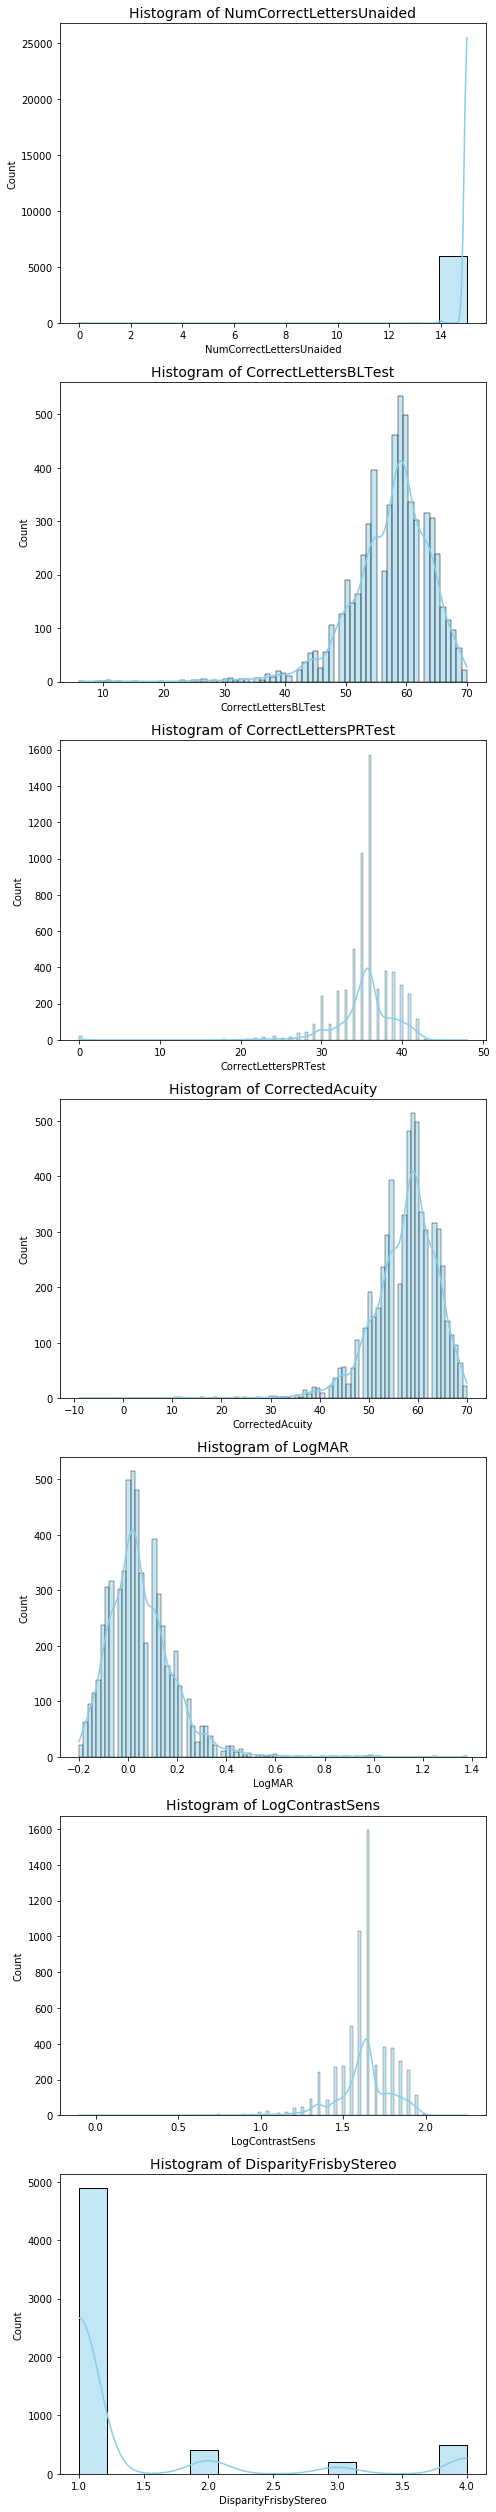

In [13]:
# Let's make a list of continuous variables based on your description
continuous_vars = ['NumCorrectLettersUnaided', 'CorrectLettersBLTest', 'CorrectLettersPRTest',
                   'CorrectedAcuity', 'LogMAR', 'LogContrastSens', 'DisparityFrisbyStereo']

# Set up the matplotlib figure
f, axes = plt.subplots(len(continuous_vars), 1, figsize=(7, 5*len(continuous_vars)))

for i, var in enumerate(continuous_vars):
    sns.histplot(data=fv, x=var, kde=True, color="skyblue", ax=axes[i])
    axes[i].set_title('Histogram of '+ var, fontsize=14)

plt.tight_layout()



In [14]:
# Calculate the correlation matrix
corr = fv.corr()

corr


,NumCorrectLettersUnaided,LettersRead10,GlassesDistance,GlassesBailey,GlassesContactBL,GlassesTypeBLTest,ContactTypeBLTest,ChartBLTest,DistBLTest,CorrectLettersBLTest,...,NonStdDistance,FrisbyStereoTest,CorrectedAcuity,LogMAR,Acuity2050Worse,Acuity2040Worse,LogContrastSens,LCSLessThanNormal,DisparityFrisbyStereo,FormInd
NumCorrectLettersUnaided,1.000000,0.939683,0.067926,0.066420,0.060848,0.064295,-0.014746,0.031231,-0.031765,0.001641,...,0.004288,0.374531,0.006742,-0.006742,0.003843,0.006484,0.004859,0.012086,-0.013522,NaN
LettersRead10,0.939683,1.000000,0.077670,0.075698,0.073349,0.067437,0.003724,0.029955,0.002221,-0.009120,...,0.002841,0.367269,-0.003400,0.003400,0.005399,0.008807,-0.005931,0.018895,-0.012384,NaN
GlassesDistance,0.067926,0.077670,1.000000,0.974612,0.944369,0.868248,0.047942,0.018080,-0.008789,0.085881,...,0.002206,0.051369,0.086339,-0.086339,-0.009943,-0.027713,-0.019830,0.018513,0.043996,NaN
GlassesBailey,0.066420,0.075698,0.974612,1.000000,0.968969,0.890865,0.049191,0.012441,-0.019751,0.099651,...,-0.001963,0.048907,0.101355,-0.101355,-0.024990,-0.041662,-0.012080,0.009455,0.043378,NaN
GlassesContactBL,0.060848,0.073349,0.944369,0.968969,1.000000,0.805438,0.270580,0.012668,-0.014516,0.089227,...,-0.003804,0.044062,0.090347,-0.090347,-0.018914,-0.034871,-0.014378,0.010177,0.045151,NaN
GlassesTypeBLTest,0.064295,0.067437,0.868248,0.890865,0.805438,1.000000,-0.166991,-0.010241,-0.023629,0.142563,...,0.007296,0.048769,0.143448,-0.143448,-0.042525,-0.061654,0.036470,-0.019163,0.019975,NaN
ContactTypeBLTest,-0.014746,0.003724,0.047942,0.049191,0.270580,-0.166991,1.000000,-0.004034,0.005276,-0.028246,...,-0.007035,-0.000997,-0.028337,0.028337,0.023630,0.011622,-0.012600,0.002719,0.017974,NaN
ChartBLTest,0.031231,0.029955,0.018080,0.012441,0.012668,-0.010241,-0.004034,1.000000,0.002083,-0.058790,...,-0.023466,0.029430,-0.056749,0.056749,0.021201,0.046513,-0.066787,0.071146,0.007046,NaN
DistBLTest,-0.031765,0.002221,-0.008789,-0.019751,-0.014516,-0.023629,0.005276,0.002083,1.000000,-0.135206,...,-0.004195,-0.087049,-0.237779,0.237779,0.301907,0.194509,-0.109584,0.060622,0.103960,NaN
CorrectLettersBLTest,0.001641,-0.009120,0.085881,0.099651,0.089227,0.142563,-0.028246,-0.058790,-0.135206,1.000000,...,-0.055843,0.058330,0.992316,-0.992316,-0.484870,-0.597198,0.626108,-0.494148,-0.316929,NaN


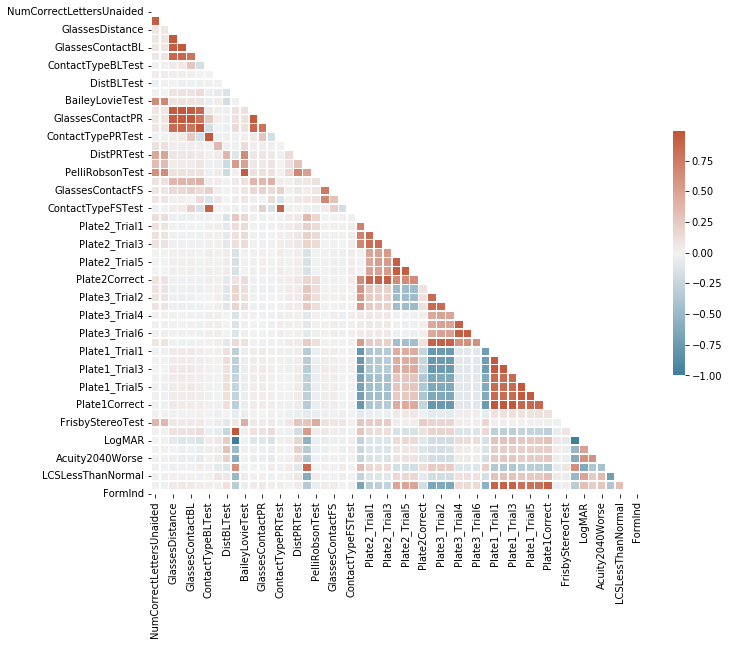

In [15]:
# Create a mask to hide the upper triangle of the correlation matrix 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

GlassesDistance, GlassesBailey, and GlassesContactBL are positively correlated with both NumCorrectLettersUnaided and LettersRead10, individuals who required glasses or contacts for distance performed well in the letter recognition.

CorrectedAcuity and LogMAR are at -1.000000, acuity improves visual impairment decreases.

CorrectLettersPRTest and CorrectLettersBLTest have a high positive correlation of 0.992316, individuals performed well in the letter recognition test with glasses also performed well in the test with contact lenses.

FrisbyStereoTest and CorrectedAcuity have a positive correlation of 0.374531, individuals with better acuity also performed better in the Frisby Stereo test.

In [17]:
# Define the file path and name, export, set to 777
import os

file_path = "/dsa/groups/casestudy2023su/team03/model_data/fv_results.csv"
fv.to_csv(file_path, index=False)
os.chmod(file_path, 0o777)

file_path_with_nulls = "/dsa/groups/casestudy2023su/team03/model_data/null_included/FV_results_with_nulls.csv"
fv_with_nulls.to_csv(file_path_with_nulls, index=False)
os.chmod(file_path_with_nulls, 0o777)